# Load the shrunken data

In [1]:
import numpy as np
import pandas as pd 
import pickle
from pathlib import Path

In [2]:
dtypes = {'buildingblock1_smiles': np.int16, 'buildingblock2_smiles': np.int16, 'buildingblock3_smiles': np.int16,
          'binds_BRD4':np.byte, 'binds_HSA':np.byte, 'binds_sEH':np.byte}

directory = Path("../data/shrunken/")

In [3]:
train = pd.read_parquet(directory / "train.parquet")

In [4]:
train.head()

,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,molecule_smiles,binds_BRD4,binds_HSA,binds_sEH
0,0,0,0,C#CCOc1ccc(CNc2nc(NCC3CCCN3c3cccnn3)nc(N[C@@H]...,0,0,0
1,0,0,1,C#CCOc1ccc(CNc2nc(NCc3cccc(Br)n3)nc(N[C@@H](CC...,0,0,0
2,0,0,2,C#CCOc1ccc(CNc2nc(NCc3ccc(OCC#C)cc3)nc(N[C@@H]...,0,0,0
3,0,0,6,C#CCOc1ccc(CNc2nc(NCCNC(=O)C(=C)C)nc(N[C@@H](C...,0,0,0
4,0,0,10,C#CCOc1ccc(CNc2nc(NCC(=O)NCC=C)nc(N[C@@H](CC#C...,0,0,0


In [5]:
# Find rows where binds_BRD4, binds_HSA, and binds_sEH are all 1
train[(train['binds_BRD4'] == 1) & (train['binds_HSA'] == 1) & (train['binds_sEH'] == 1)]

,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,molecule_smiles,binds_BRD4,binds_HSA,binds_sEH
4446476,12,167,298,COc1ccc(Nc2nc(NCc3ccc4[nH]c(C)cc4c3)nc(NC(CCC(...,1,1,1
5488751,15,76,298,CCOc1cc(Nc2nc(NCc3ccc4[nH]c(C)cc4c3)nc(NC(COC(...,1,1,1
5568350,15,231,298,Cc1cc2cc(CNc3nc(Nc4ccc(F)c(C)c4)nc(NC(COC(C)(C...,1,1,1
5573221,15,241,588,Cc1cc(Nc2nc(NCC3CN4CCN3CC4)nc(NC(COC(C)(C)C)C(...,1,1,1
5826969,16,32,298,Cc1cc2cc(CNc3nc(NCCC(C)S(C)=O)nc(NC(CC(C)C)C(=...,1,1,1
...,...,...,...,...,...,...,...
69853081,192,241,588,Cc1cc(Nc2nc(NCC3CN4CCN3CC4)nc(Nc3cccc(C(=O)N[D...,1,1,1
71306089,196,241,588,Cc1cc(Nc2nc(NCC3CN4CCN3CC4)nc(Nc3cccc(I)c3C(=O...,1,1,1
76388759,210,241,588,Cc1cc(Nc2nc(NCC3CN4CCN3CC4)nc(Nc3ncc(Br)cc3C(=...,1,1,1
88372204,243,241,588,Cc1cc(Nc2nc(NCC3CN4CCN3CC4)nc(N[C@H](CC(=O)N[D...,1,1,1


In [6]:
# Find the percentage of binds_BRD4 that are 1 and also in the binds of sEH
seh_binds = train[train['binds_sEH'] == 1]
brd4_binds = train[train['binds_BRD4'] == 1]
hsa_binds = train[train['binds_HSA'] == 1]
subset_brd4_seh = brd4_binds[brd4_binds.index.isin(seh_binds.index)]
subset_hsa_seh = hsa_binds[hsa_binds.index.isin(seh_binds.index)]
subset_brd4_hsa = brd4_binds[brd4_binds.index.isin(hsa_binds.index)]
print(f"Count seh_binds: {len(seh_binds)}, Count brd4_binds: {len(brd4_binds)}, Count subset: {len(subset_brd4_seh)}, percentage: {len(subset_brd4_seh)/len(brd4_binds)}")
print(f"Count hsa_binds: {len(hsa_binds)}, Count subset_hsa_seh: {len(subset_hsa_seh)}, percentage: {len(subset_hsa_seh)/len(hsa_binds)}")
print(f"Count subset_brd4_hsa: {len(subset_brd4_hsa)}, percentage: {len(subset_brd4_hsa)/len(brd4_binds)}")
print(f"Percentage of seh in brd4: {len(subset_brd4_seh)/len(seh_binds)}")
print(f"Percentage of seh in hsa: {len(subset_hsa_seh)/len(seh_binds)}")

Count seh_binds: 724532, Count brd4_binds: 456964, Count subset: 659, percentage: 0.001442126732083928
Count hsa_binds: 408410, Count subset_hsa_seh: 79233, percentage: 0.19400357483900982
Count subset_brd4_hsa: 297, percentage: 0.00064994178972523
Percentage of seh in brd4: 0.0009095526491583533
Percentage of seh in hsa: 0.10935748869615144


In [7]:
brd4_binds

,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,molecule_smiles,binds_BRD4,binds_HSA,binds_sEH
3574,0,6,16,C#CC[C@@H](CC(=O)N[Dy])Nc1nc(NCCSC(C)=O)nc(NCC...,1,0,0
3873,0,6,416,C#CC[C@@H](CC(=O)N[Dy])Nc1nc(NCC(=C)Cl)nc(Nc2c...,1,0,0
4715,0,7,752,C#CC[C@@H](CC(=O)N[Dy])Nc1nc(NCC2CCC(=C)CC2)nc...,1,0,0
7581,0,14,25,C#CC[C@@H](CC(=O)N[Dy])Nc1nc(NCCSC(C)=O)nc(Nc2...,1,0,0
7605,0,14,64,C#CC[C@@H](CC(=O)N[Dy])Nc1nc(NCCSC(C)=O)nc(NCc...,1,0,0
...,...,...,...,...,...,...,...
98411640,270,684,416,Cn1cc(Nc2nc(Nc3nccnc3Br)nc(N[C@@H](CCCN=[N+]=[...,1,0,0
98412227,270,685,416,Cn1cc(Nc2nc(Nc3nccnc3Cl)nc(N[C@@H](CCCN=[N+]=[...,1,0,0
98412329,270,685,589,[N-]=[N+]=NCCC[C@H](Nc1nc(NCC2CS(=O)(=O)c3cccc...,1,0,0
98414696,270,691,416,Cn1cc(Nc2nc(Nc3nncs3)nc(N[C@@H](CCCN=[N+]=[N-]...,1,0,0


In [74]:
brd4_binds.molecule_smiles.to_list()[0]

'C#CC[C@@H](CC(=O)N[Dy])Nc1nc(NCCSC(C)=O)nc(NCC(=C)Cl)n1'

In [8]:
BBs_dict_reverse_1 = pickle.load(open(directory / 'train_dicts/BBs_dict_reverse_1.p', 'br'))
BBs_dict_reverse_2 = pickle.load(open(directory / 'train_dicts/BBs_dict_reverse_2.p', 'br'))
BBs_dict_reverse_3 = pickle.load(open(directory / 'train_dicts/BBs_dict_reverse_3.p', 'br'))

In [9]:
buildingblock3_smiles_original = [BBs_dict_reverse_3[x] for x in train.buildingblock3_smiles[:1000]]
print(buildingblock3_smiles_original[0])

Br.Br.NCC1CCCN1c1cccnn1


In [13]:
import rdkit

In [46]:
rdkit.Chem.MolFromSmiles(buildingblock3_smiles_original[1])

# Show chemical structure of buildingblock3_smiles one by one, in a slide show
from rdkit import Chem
from rdkit.Chem import Draw

mols = [Chem.MolFromSmiles(x) for x in buildingblock3_smiles_original]

## Chem.rdchem.Mol

In [54]:
mol = mols[0]


2

#### Descriptors

In [58]:
from rdkit.Chem import Descriptors

# Example: Calculate the molecular weight
mol_weight = Descriptors.MolWt(mol)
print(f"Molecular Weight: {mol_weight}")

# Calculate all descriptors
all_descriptors = {desc_name: desc_func(mol) for desc_name, desc_func in Descriptors.descList}
print(len(all_descriptors))

# Display all descriptors in table vertically
from IPython.display import display, HTML

html = "<table>"
for key, value in all_descriptors.items():
    html += f"<tr><td>{key}</td><td>{value}</td></tr>"
html += "</table>"
display(HTML(html))

Molecular Weight: 340.063
210


MaxAbsEStateIndex,5.671687452758881
MaxEStateIndex,5.671687452758881
MinAbsEStateIndex,0.0
MinEStateIndex,0.0
qed,0.8879847523713709
SPS,19.266666666666666
MolWt,340.063
HeavyAtomMolWt,323.93500000000006
ExactMolWt,337.97417071200005
NumValenceElectrons,86
NumRadicalElectrons,0


In [59]:
from rdkit.Chem import AllChem

# Example: Generate Morgan fingerprint
fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=1024)
print(list(fingerprint))


[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 

In [60]:
# Number of rings
num_rings = Chem.GetSSSR(mol)
print(f"Number of Rings: {num_rings}")

# Bond types
bonds = [bond.GetBondType() for bond in mol.GetBonds()]
print(f"Bond Types: {bonds}")


Number of Rings: <rdkit.rdBase._vectSt6vectorIiSaIiEE object at 0x706545ff54c0>
Bond Types: [rdkit.Chem.rdchem.BondType.SINGLE, rdkit.Chem.rdchem.BondType.SINGLE, rdkit.Chem.rdchem.BondType.SINGLE, rdkit.Chem.rdchem.BondType.SINGLE, rdkit.Chem.rdchem.BondType.SINGLE, rdkit.Chem.rdchem.BondType.SINGLE, rdkit.Chem.rdchem.BondType.SINGLE, rdkit.Chem.rdchem.BondType.AROMATIC, rdkit.Chem.rdchem.BondType.AROMATIC, rdkit.Chem.rdchem.BondType.AROMATIC, rdkit.Chem.rdchem.BondType.AROMATIC, rdkit.Chem.rdchem.BondType.AROMATIC, rdkit.Chem.rdchem.BondType.SINGLE, rdkit.Chem.rdchem.BondType.AROMATIC]


In [63]:
# Generate conformations
AllChem.EmbedMolecule(mol)
conformer = mol.GetConformer()
for atom in mol.GetAtoms():
    pos = conformer.GetAtomPosition(atom.GetIdx())
    print(f"Atom {atom.GetSymbol()}, Position: {pos.x}, {pos.y}, {pos.z}")


Atom Br, Position: 0.0, 0.0, 0.0
Atom Br, Position: 0.0, 0.0, 0.0
Atom N, Position: -2.130796063034429, 2.196112487781607, 1.8132741470523428
Atom C, Position: -1.2540807386966288, 1.5092298797321837, 0.8853735263977903
Atom C, Position: -1.459432039190416, 0.013872904651805964, 0.9425220218477479
Atom C, Position: -2.8550884098870863, -0.39607470909730885, 0.5991504793214557
Atom C, Position: -2.688656143409877, -1.0359462123882912, -0.784192956984529
Atom C, Position: -1.3334635008690081, -1.7287472394767511, -0.5897629707943891
Atom N, Position: -0.5782784408162375, -0.6620563169497432, 0.03510020307734732
Atom C, Position: 0.7909110519304878, -0.2975286040734947, -0.16929782004060942
Atom C, Position: 1.5077877090361802, -1.0605310143860254, -1.0886884403259147
Atom C, Position: 2.823533150318694, -0.696915832454021, -1.273775693053521
Atom C, Position: 3.3056631426442933, 0.3681401878032671, -0.5480026273036345
Atom N, Position: 2.5616847326598404, 1.060026189934064, 0.32100885454

[16:11:28] Molecule does not have explicit Hs. Consider calling AddHs()


## Graph representation using RDKit

In [64]:
# Access atoms and bonds
atoms = [atom.GetSymbol() for atom in mol.GetAtoms()]
bonds = [(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()) for bond in mol.GetBonds()]

print("Atoms:", atoms)
print("Bonds:", bonds)


Atoms: ['Br', 'Br', 'N', 'C', 'C', 'C', 'C', 'C', 'N', 'C', 'C', 'C', 'C', 'N', 'N']
Bonds: [(2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (8, 4), (14, 9)]


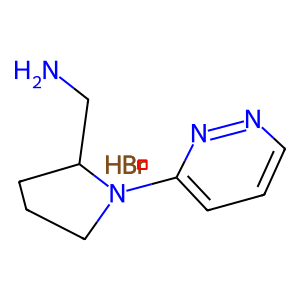

In [66]:
# Draw the molecule
Draw.MolToImage(mol)

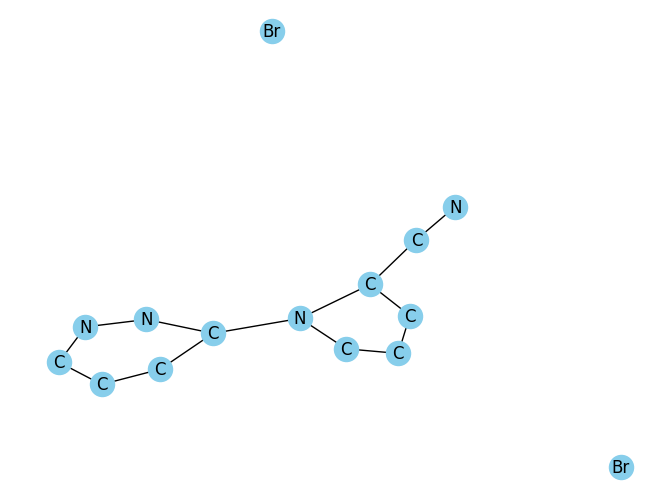

In [67]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()
G.add_nodes_from(range(len(atoms)))
G.add_edges_from(bonds)

# Position nodes using spring layout
pos = nx.spring_layout(G)

# Draw the graph
nx.draw(G, pos, with_labels=True, labels={i: atom for i, atom in enumerate(atoms)}, node_color='skyblue')
plt.show()
